In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка гипотез "Самые популярные жанры (по годам)" и "Страны с наибольшим количеством металл групп (по годам)"

#### Для проверки гипотезы необходимо преобразовать датасет: 
- определить все жанры 
- разложить данные по жанрам

#### Предобработка

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./metal_bands_2017.csv',encoding='latin-1')
data.shape

(5000, 7)

In [5]:
data.head(2)

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"


In [6]:
data["fans"]

0       4195
1       4147
2       3712
3       3105
4       3054
        ... 
4995       0
4996       0
4997       0
4998       0
4999       0
Name: fans, Length: 5000, dtype: int64

In [7]:
data.columns[data.isna().any()]

Index(['origin'], dtype='object')

In [8]:
dataset = data.iloc[:, 1:7]
dataset.head(2)

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"


In [9]:
dataset["origin"].isnull().sum()

8

In [10]:
dataset["origin"].fillna("undefined", inplace=True)
dataset["origin"].isnull().sum()

0

In [11]:
dataset.band_name.duplicated().sum()

51

In [12]:
new_data = dataset.drop_duplicates(keep='first')
new_data.shape

(4950, 6)

#### Извлечение жанров

In [90]:
for i in new_data["style"].str.split(','):
    i = i[0]
    print(i)

New wave of british heavy
Extreme progressive
Heavy
Thrash
Melodic death
Thrash
Progressive death
Progressive
Doom
Symphonic power
Extreme power
Heavy
Power
Gothenburg
Heavy
Gothenburg
Atmospheric black
Extreme folk
Gothenburg
Blackened doom
Death
Symphonic black
Teutonic thrash
Extreme power
Melodic death
Death
Symphonic power
Progressive
Speed
Bay area thrash
Symphonic
Death
Groove thrash
Heavy
Death doom
Progressive
Celtic folk
Progressive death
Industrial
Power
Progressive stoner
Brutal death
Alternative
Folk
Death
Death
Viking black
Black
Progressive rock
Extreme gothic
Melodic death
Death doom
Progressive hard rock
Heavy
Power
Gothic
Heavy
Extreme power
Grindcore
Black
Thrash
Death
Technical thrash
Extreme folk
Atmospheric death
Viking folk
Groove thrash
Alternative
Symphonic
Viking black
Bay area thrash
Gothic doom
Alternative
Hard rock
Progressive
Melodic death
Power
Symphonic power
Death
Heavy
Death
Folk
Heavy
Power
Melodic death
Power
Death
Death
Symphonic power
Black
Atmosph

Black
Pagan black
Pagan folk
Power
Symphonic
Metalcore
Progressive gothic
Black
Power
Black
Power
Symphonic power
Death
Death doom
Melodic death
Math
Black
Symphonic black
Progressive death
Death
Deathcore
Us power
Doom
Technical death
Death
Melodic death
Grindcore
Death
Progressive
Crust
Metalcore
Technical death
Power
Melodic death
Progressive
Death
Metalcore
Gothenburg
Brutal death
Avantgarde metalcore
Melodic death
Stoner
Black
Doom
Death
Brutal death
Black
Black
Melodic black
Symphonic
Gothic
Post-metal
Heavy
Progressive
Funeral doom
Depressive black
Industrial
Progressive power
Death
Heavy
Power
Progressive rock
Doom
Atmospheric black
Black
Gothic black
Progressive
Black
Symphonic
Psychedelic black
Power
Black
Symphonic gothic
Heavy
Black
Thrash
Heavy
Black
Technical thrash
Symphonic power
Blackened heavy
Black
Alternative
Heavy
Progressive thrash
Folk
Industrial rock
Black
Power
Power
Celtic black
Black
Heavy
Melodic death
Power
Pagan black
Melodic black
Death
Metalcore
Avantgar

Industrial
Heavy
Melodic death
Melodic death
Progressive death
Grindcore
Black
Power
Power
Experimental black
Black
Folk
Black
Melodic metalcore
Thrash
Gothic
Black
Doom
Post-metal
Black
Grindcore
Death
Thrash
Death
Death doom
New wave of british heavy
Death
Death doom
Melodic death
Electronic symphonic
Death
Hard rock
Technical death
Heavy
Melodic power
Black
Folk
Gothic
Gothic doom
Progressive
Symphonic progressive
Power
Black
Atmospheric death
Melodic hard rock
Black
Thrash
Grindcore
Death
Technical death
Atmospheric black
Death doom
Hard rock
Symphonic
Deathgrind
Symphonic black
Folk
Gothic doom
Gothic rock
Black
Crossover thrash
Progressive
Hard rock
Melodic black
Melodic death
Symphonic
Death
Doom
Atmospheric black
Black
Thrash
Blackened death
Black
Folk
Industrial
Thrash
Heavy
Black
Doom
Hard rock
Death
Death
Progressive thrash
Melodic black
Hard rock
Hardcore
Metalcore
Progressive black
Symphonic black
Doom
Melodic power
Power
Industrial
Sludge
Metalcore
Death
Atmospheric black

In [13]:
styles = new_data["style"].str.split(",", expand=True)
new_data['main_style'] = styles[0]
new_data['style_2'] = styles[1]
new_data['style_3'] = styles[2]
new_data['style_4'] = styles[3]
new_data['style_5'] = styles[4]
new_data['style_6'] = styles[5]

In [14]:
new_data['main_style'].value_counts().head()

Black          590
Death          427
Heavy          344
Progressive    244
Doom           228
Name: main_style, dtype: int64

In [15]:
new_data.head()

,band_name,fans,formed,origin,split,style,main_style,style_2,style_3,style_4,style_5,style_6
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,None,None,None,None
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Progressive,None,None,None
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,None,None,None,None
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,Hard rock,None,None,None
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,None,None,None,None


In [16]:
new_data.drop("style", axis=1, inplace=True)

In [17]:
new_data.head(2)

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
0,Iron Maiden,4195,1975,United Kingdom,-,New wave of british heavy,Heavy,None,None,None,None
1,Opeth,4147,1990,Sweden,1990,Extreme progressive,Progressive rock,Progressive,None,None,None


#### График происхождения групп

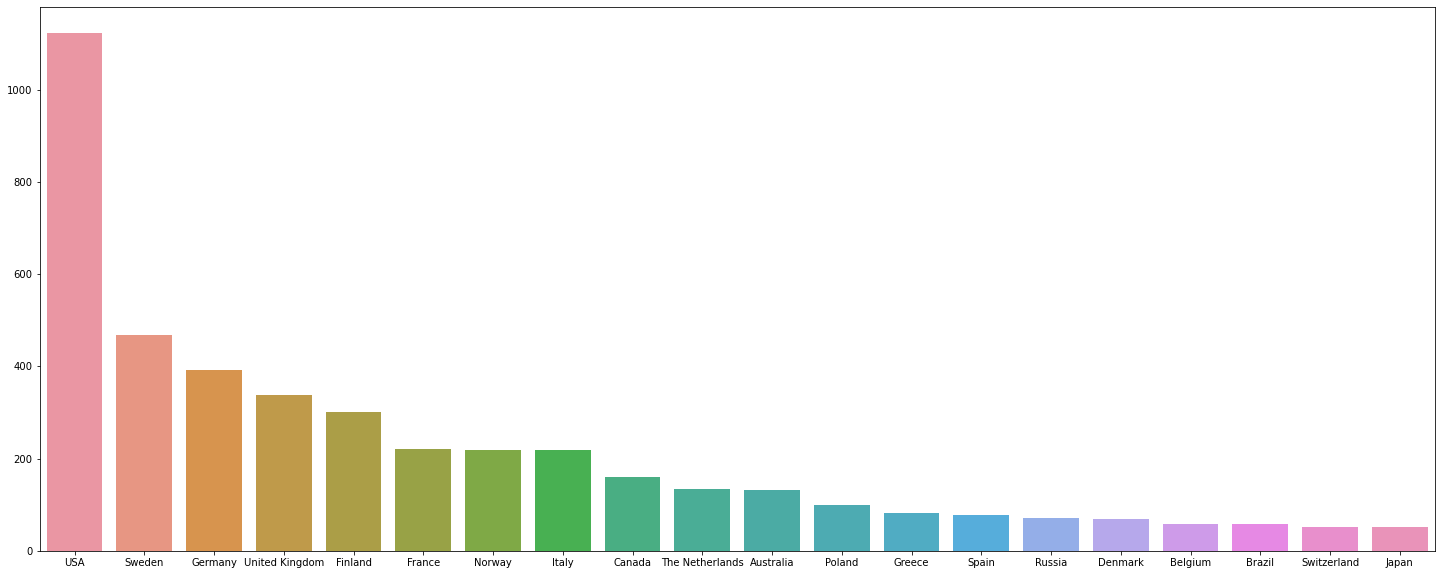

In [18]:
plt.subplots(figsize=(25,10))
origin_total = new_data["origin"].value_counts()
sns.barplot(x=origin_total[:20].keys(), y=origin_total[:20].values)

#### График происхождения групп по годам

In [19]:
datagraphs = new_data
datagraphs.shape

(4950, 11)

In [20]:
datagraphs = datagraphs[datagraphs.formed != '-']
datagraphs.shape

(4946, 11)

In [21]:
datagraphs['formed'] = pd.to_numeric(datagraphs['formed'])

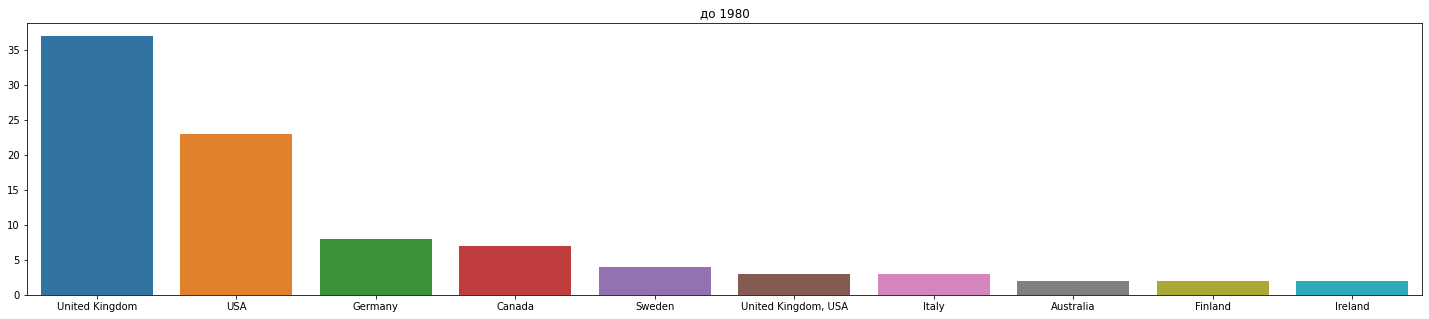

In [23]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('до 1980')
origin_total = datagraphs.loc[datagraphs['formed'] < 1980]["origin"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

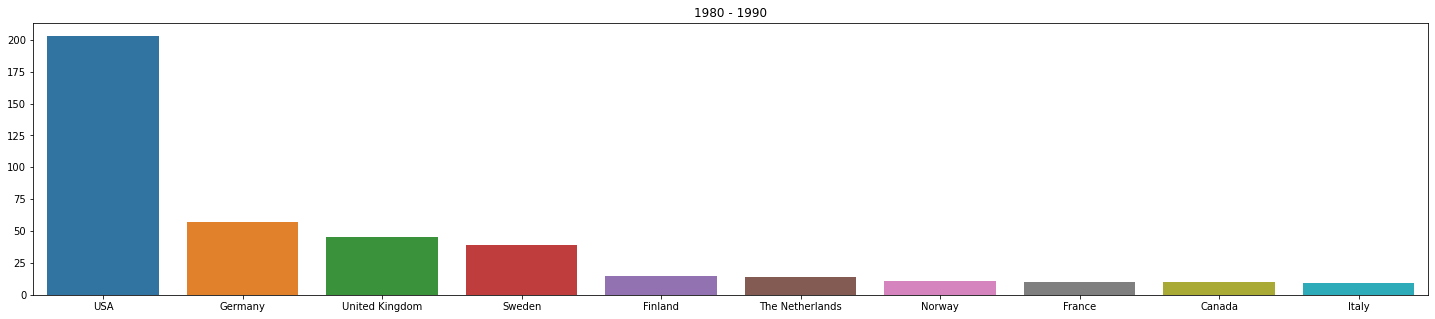

In [24]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('1980 - 1990')
origin_total = datagraphs.loc[datagraphs['formed'] < 1990].loc[datagraphs['formed'] >= 1980]["origin"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

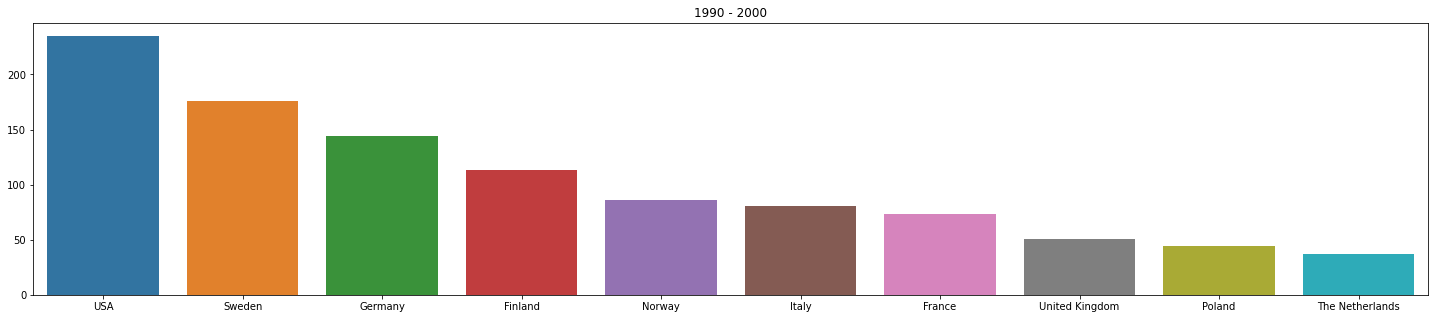

In [25]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('1990 - 2000')
origin_total = datagraphs.loc[datagraphs['formed'] < 2000].loc[datagraphs['formed'] >= 1990]["origin"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

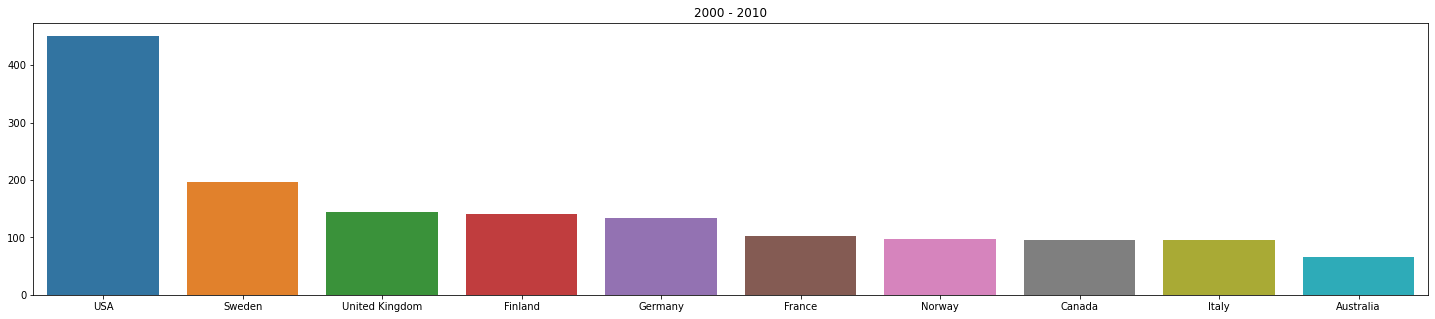

In [26]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('2000 - 2010')
origin_total = datagraphs.loc[datagraphs['formed'] < 2010].loc[datagraphs['formed'] >= 2000]["origin"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

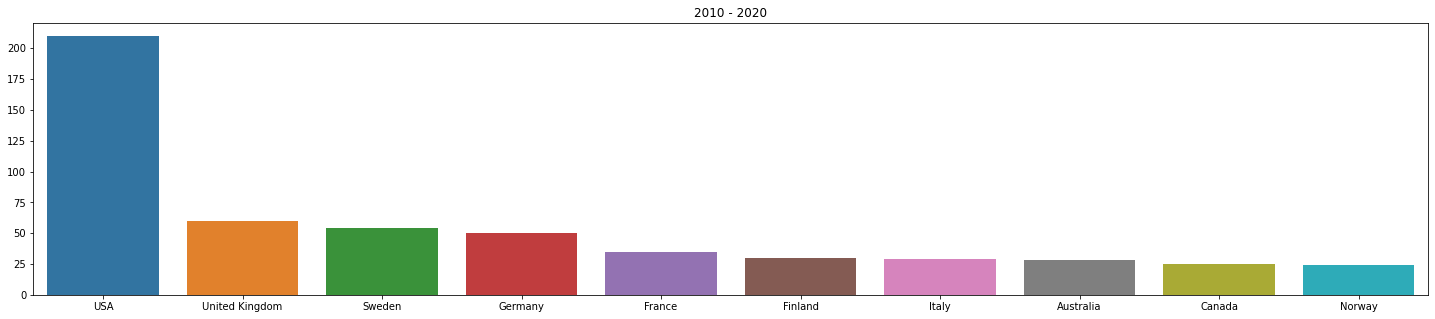

In [27]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('2010 - 2020')
origin_total = datagraphs.loc[datagraphs['formed'] < 2017].loc[datagraphs['formed'] >= 2010]["origin"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

## Выводы по гипотезе "Происхождение групп":
Результаты проверки гипотезы показали, что наибольшее количество металл групп родом из США. Далее идут европейские государства. Наибольшее количество европейских металл групп родом из Швеции, Германии, Великобритании и Финляндии. Россия в списке топ-20 стран на 15 месте.

По результатам разбиения по годам можно сделать следующие интересные выводы. Первые метал группы появились в Великобритании. В 80-х наибольшее количество новых групп появилось в США. В 90-е появилось много шведских групп. 

#### График популярных жанров

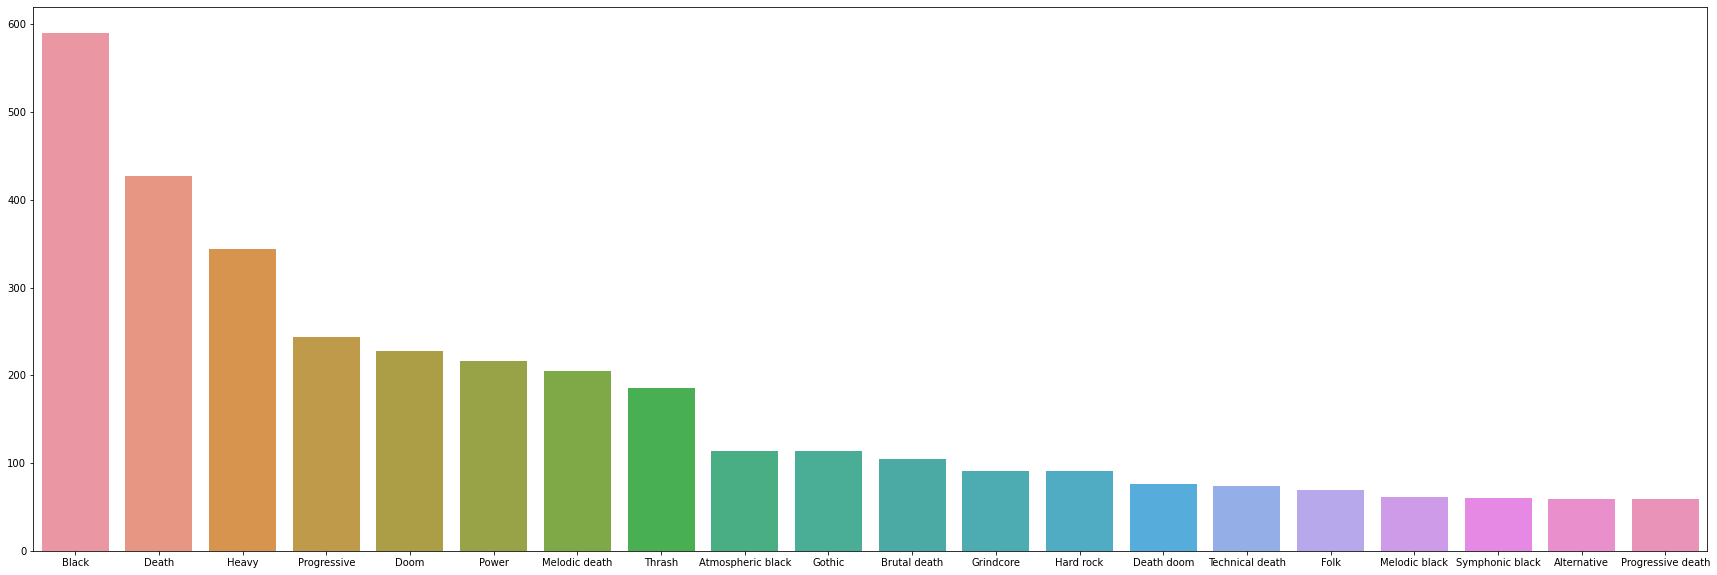

In [28]:
style_count = new_data["main_style"].value_counts()
plt.subplots(figsize=(30,10))
sns.barplot(x=style_count[:20].keys(), y=style_count[:20].values)

#### График популярных жанров по годам

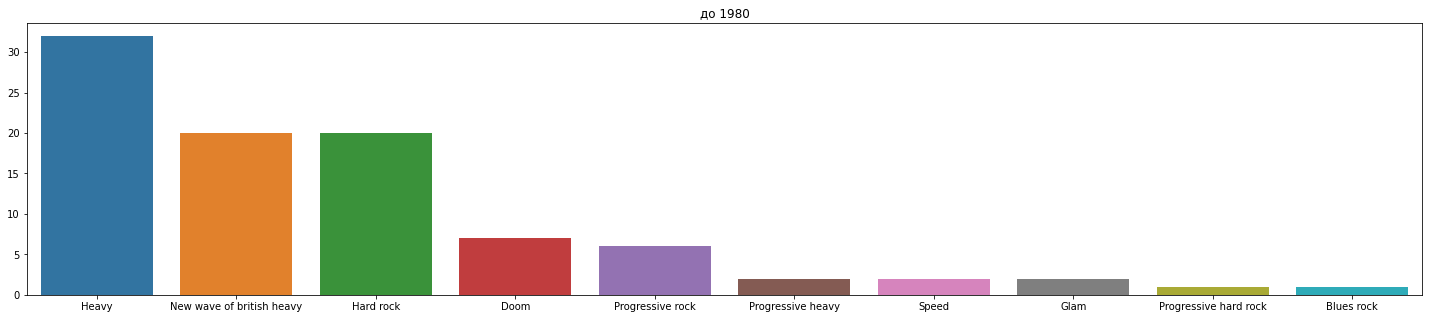

In [29]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('до 1980')
origin_total = datagraphs.loc[datagraphs['formed'] < 1980]["main_style"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

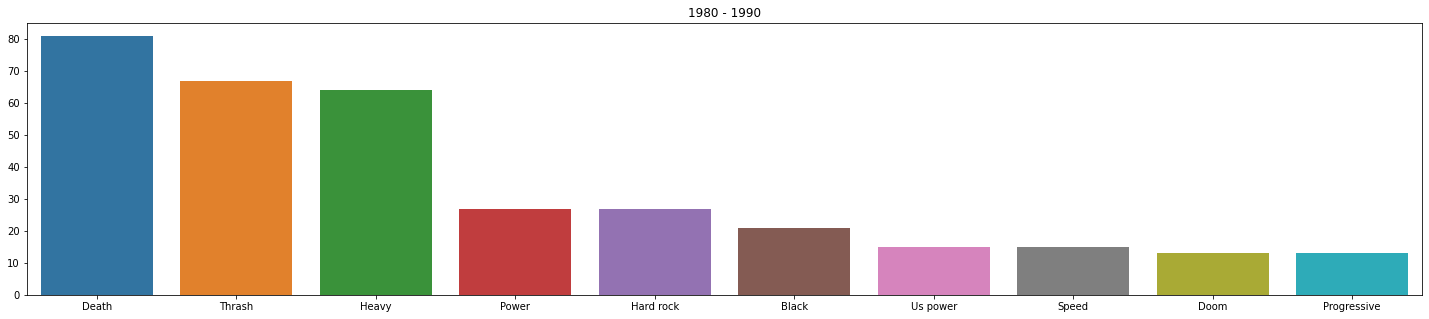

In [30]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('1980 - 1990')
origin_total = datagraphs.loc[datagraphs['formed'] < 1990].loc[datagraphs['formed'] >= 1980]["main_style"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

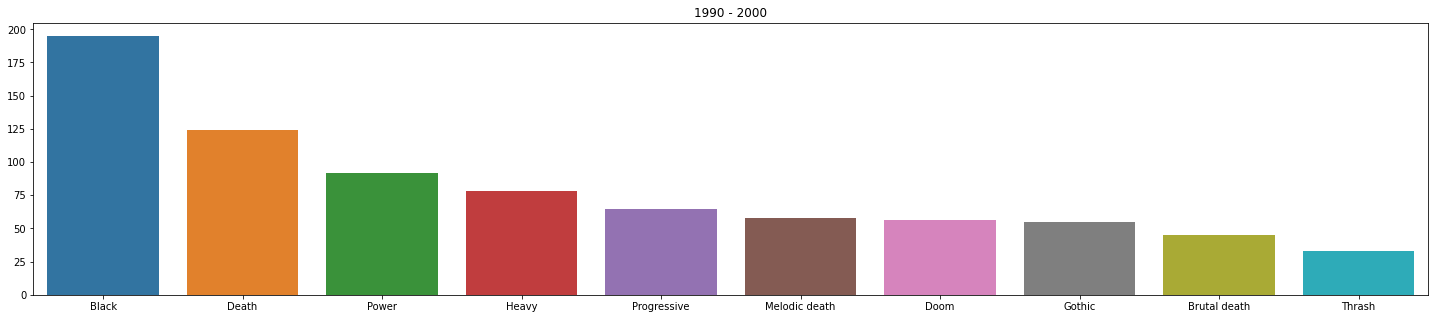

In [31]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('1990 - 2000')
origin_total = datagraphs.loc[datagraphs['formed'] < 2000].loc[datagraphs['formed'] >= 1990]["main_style"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

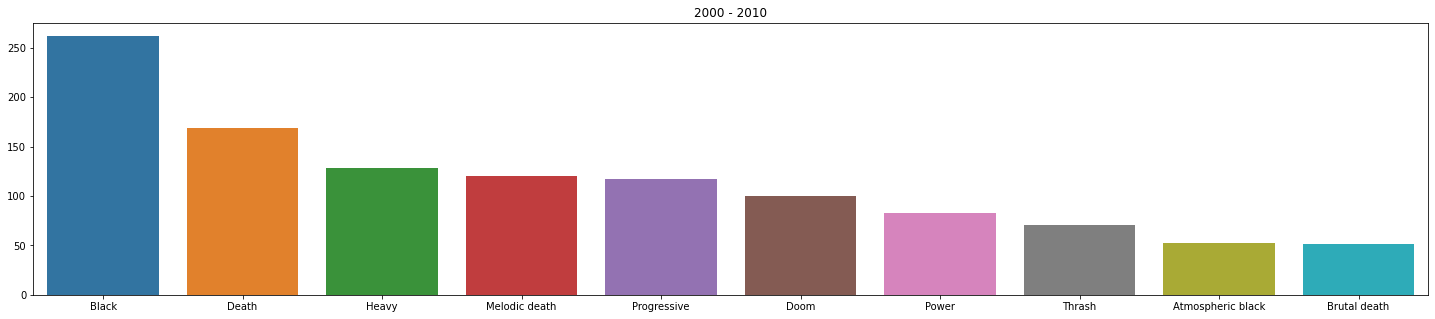

In [32]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('2000 - 2010')
origin_total = datagraphs.loc[datagraphs['formed'] < 2010].loc[datagraphs['formed'] >= 2000]["main_style"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

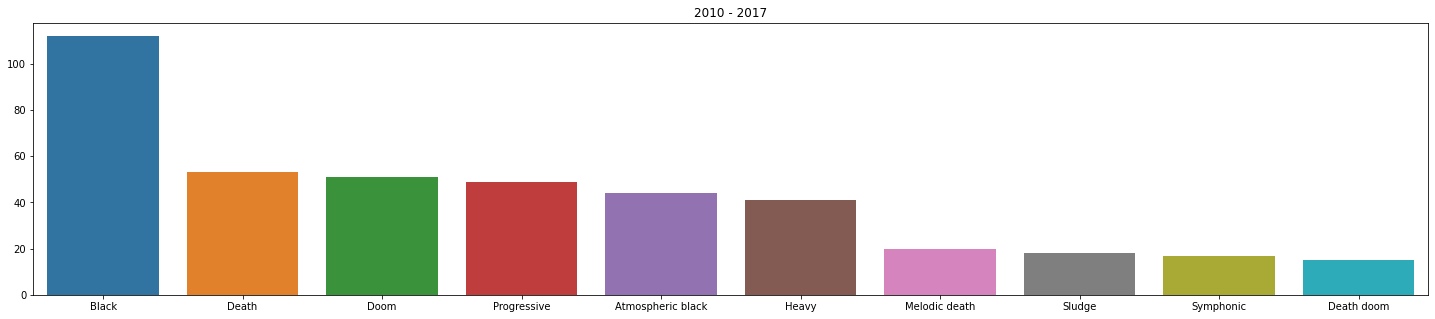

In [33]:
fig, ax = plt.subplots(figsize=(25,5))
ax.set_title('2010 - 2017')
origin_total = datagraphs.loc[datagraphs['formed'] < 2017].loc[datagraphs['formed'] >= 2010]["main_style"].value_counts()
sns.barplot(x=origin_total[:10].keys(), y=origin_total[:10].values)

## Выводы по гипотезе "Популярные жанры":
За все время наблюдения самыми популярными жанрами среди метал групп являются Black, Death и Heavy.

По результатам разбиения по годам можно сделать следующие выводы. До 80-го года самым популярным жанром среди групп, играющих металл, являлялся жанр Heavy. В 80-ых наиболее популярным был жанр Death. С 90-ых годов и до сих пор самым популярным жанром металл является Black. Можно заметить, что процент групп, играющих в жанре Doom, c 80-ых годов постепенно увеличивается. 

# Проверка гипотезы "Самый персективный жанр"

#### Рассмотрены 5 самых популярных жанров из предыдущего пункта

## 1) Black-metal

In [661]:
import random
datagraphs.shape

(4946, 11)

In [662]:
black = datagraphs.loc[datagraphs['main_style'] == 'Black']
black.shape

(590, 11)

In [663]:
black.loc[black['formed'] == 1985].head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
877,Sarcófago,74,1985,Brazil,1985,Black,Thrash,Death,None,None,None
1682,Salem,26,1985,Israel,-,Black,Doom,Death,None,None,None
3229,Holocausto,6,1985,Brazil,1985,Black,Thrash,Technical thrash,None,None,None
3278,Satanic Slaughter,6,1985,Sweden,-,Black,Death,Thrash,None,None,None


In [664]:
xx = np.arange(black.formed.min(), black.formed.max()+1)
# xx = shuffle(xx, random_state=0)
yy = []

for year in xx:
    black_y = black.loc[black['formed'] == year]
    black_fans = black_y.fans.sum()
    yy.append(black_fans)

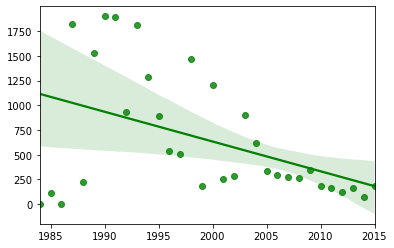

In [665]:
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
# np.random.seed(8)
xx, yy = shuffle(xx, yy, random_state=0)
ax = sns.regplot(x=xx, y=yy, color="g")

In [666]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(black, test_size=0.2)
train_df.head(3)

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
3850,Crowned,3,2010,Australia,-,Black,None,None,None,None,None
1051,Isengard,57,1989,Norway,1989,Black,Folk,None,None,None,None
2460,Gospel Of The Horns,12,1993,Australia,-,Black,None,None,None,None,None


In [667]:
# X = np.array(train_df["formed"] - black.formed.min())
# X = X.reshape(-1,1)
# y = train_df["fans"]/black.fans.max()

In [668]:
# X_test = np.array(test_df["formed"] - black.formed.min())
# X_test = X_test.reshape(-1,1)
# y_test = test_df["fans"]/black.fans.max()

In [669]:
X = np.asarray(xx[:24] - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy[:24])/np.asarray(yy).max()

In [670]:
X_test = np.asarray(xx[24:] - black.formed.min())
X_test = X_test.reshape(-1,1)
y_test = np.asarray(yy[24:])/np.asarray(yy).max()

### Линейная регрессия

In [671]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [672]:
model1 = LinearRegression()

In [673]:
model1.fit(X, y)

LinearRegression()

In [674]:
model1_pred = model1.predict(X_test.reshape(-1,1))

In [675]:
# The coefficients
print("Coefficients: \n", model1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, model1_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, model1_pred))

Coefficients: 
 [-0.0133243]
Mean squared error: 0.15
Coefficient of determination: 0.14


Предсказание на 2020 год

In [676]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()
model1.fit(X, y)
model1.predict(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([31.22067449])

### Полиномиальная регрессия

In [677]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

In [688]:
# Формирование последовательности действий
polynomial_transformation = PolynomialFeatures(degree=5)
model = LinearRegression(fit_intercept=False)

step__preprocessing = ("polynomial_transformation", polynomial_transformation)
step__prediction_model = ("linear_model", model)

pipeline = Pipeline([
    step__preprocessing, 
    step__prediction_model])

# Обучение
pipeline = pipeline.fit(X, y)

# Параметры обученной модели
print("Параметры модели:")
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx, coef))

Параметры модели:
	w0 = -0.17339438016098987
	w1 = 0.3554706714405139
	w2 = -0.046903101768328403
	w3 = 0.002508742221025575
	w4 = -6.168967743084532e-05
	w5 = 5.770088974365841e-07


In [689]:
# Функция предсказания
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

# Предсказания для тестового множества
y_test_pred = pipeline.predict(X_test)

# Ошибки на тестовом множестве
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Тестовое множество:")
print("\tTest MSE:", mse_test)
print("\tTest R^2:", r2_test)

Тестовое множество:
	Test MSE: 0.062460337028914785
	Test R^2: 0.6351104296625217


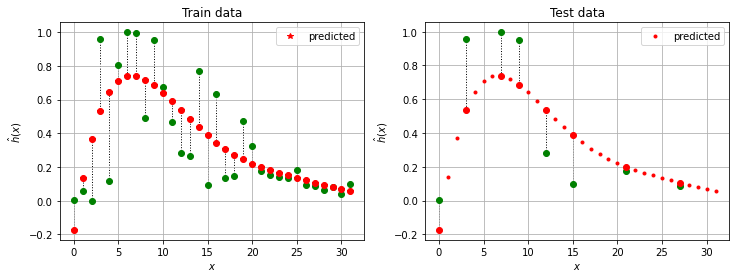

In [696]:
xxx = np.asarray(xx - black.formed.min())

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.vlines(X, ymin=y, ymax=f_pred(X), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X, y, color="green", zorder=2)
plt.plot(np.asarray(xxx), f_pred(xxx), "*", color="red", lw=2, label="predicted", zorder=2)
# plt.plot(xxx, yy/np.asarray(yy).max(), "o", color="SteelBlue", label="true function", zorder=1)
plt.plot(X, f_pred(X), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.vlines(X_test, ymin=y_test, ymax=f_pred(X_test), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X_test, y_test, color="green", zorder=2)
plt.plot(xxx, f_pred(xxx), ".", color="red", lw=2, label="predicted", zorder=2)
# plt.plot(xxx, f(xxx), "-", color="SteelBlue", label="true function", zorder=1)
plt.plot(X_test, f_pred(X_test), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.show()

### Предсказание на 2020 год

In [691]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()
pipeline = pipeline.fit(X, y)
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

In [692]:
f_pred(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([[303.16259855]])

## 2) Death-metal

In [547]:
import random
datagraphs.shape

(4946, 11)

In [548]:
black = datagraphs.loc[datagraphs['main_style'] == 'Death']
black.shape

(427, 11)

In [549]:
black.loc[black['formed'] == 1985].head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
1232,Deceased,43,1985,USA,-,Death,Thrash,Heavy,None,None,None
1248,Atrocity,42,1985,Germany,-,Death,Gothic industrial,None,None,None,None
1831,Loudblast,22,1985,France,1985,Death,Thrash,None,None,None,None
3057,Insanity,7,1985,USA,1985,Death,None,None,None,None,None


In [550]:
xx = np.arange(black.formed.min(), black.formed.max()+1)
# xx = shuffle(xx, random_state=0)
yy = []

for year in xx:
    black_y = black.loc[black['formed'] == year]
    black_fans = black_y.fans.sum()
    yy.append(black_fans)

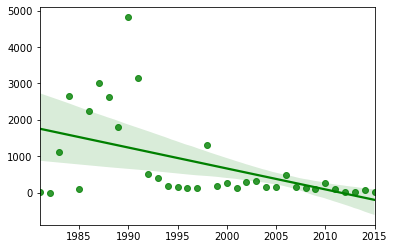

In [551]:
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
# np.random.seed(8)
# xx, yy = shuffle(xx, yy, random_state=0)
ax = sns.regplot(x=xx, y=yy, color="g")

In [552]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()

### Предсказание на 2020 год
Линейная регрессия

In [553]:
model1 = LinearRegression()
model1.fit(X, y)
model1.predict(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([-484.0302521])

Полиномиальная регрессия

In [567]:
# Формирование последовательности действий
polynomial_transformation = PolynomialFeatures(degree=5)
model = LinearRegression(fit_intercept=False)

step__preprocessing = ("polynomial_transformation", polynomial_transformation)
step__prediction_model = ("linear_model", model)

pipeline = Pipeline([
    step__preprocessing, 
    step__prediction_model])

# Обучение
pipeline = pipeline.fit(X, y)

# Параметры обученной модели
print("Параметры модели:")
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx, coef))

# Функция предсказания
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

Параметры модели:
	w0 = -0.13427071571601723
	w1 = 0.2722082220719554
	w2 = -0.03790924468096797
	w3 = 0.00199556584098119
	w4 = -4.5615526016048965e-05
	w5 = 3.7863677836034996e-07


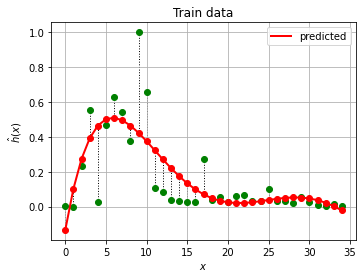

In [568]:
xxx = np.asarray(xx - black.formed.min())

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.vlines(X, ymin=y, ymax=f_pred(X), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X, y, color="green", zorder=2)
plt.plot(np.asarray(xxx), f_pred(xxx), "-", color="red", lw=2, label="predicted", zorder=2)
#plt.plot(xxx, yy/np.asarray(yy).max(), "o", color="SteelBlue", label="true function", zorder=1)
plt.plot(X, f_pred(X), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.show()

In [569]:
f_pred(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([[-817.77812123]])

## 3) Heavy-metal

In [570]:
import random
datagraphs.shape

(4946, 11)

In [571]:
black = datagraphs.loc[datagraphs['main_style'] == 'Heavy']
black.shape

(343, 11)

In [572]:
black.loc[black['formed'] == 1985].head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
33,Iced Earth,1403,1985,USA,1985,Heavy,Us power,None,None,None,None
159,King Diamond,641,1985,"Denmark, USA",1985,Heavy,None,None,None,None,None
785,Rata Blanca,86,1985,Argentina,1985,Heavy,Hard rock,Power,None,None,None
861,Aria,75,1985,Russia,1985,Heavy,None,None,None,None,None
995,Racer X,61,1985,USA,1985,Heavy,None,None,None,None,None


In [573]:
xx = np.arange(black.formed.min(), black.formed.max()+1)
# xx = shuffle(xx, random_state=0)
yy = []

for year in xx:
    black_y = black.loc[black['formed'] == year]
    black_fans = black_y.fans.sum()
    yy.append(black_fans)

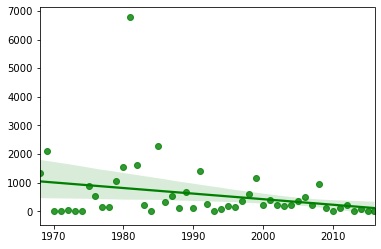

In [574]:
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
# np.random.seed(8)
# xx, yy = shuffle(xx, yy, random_state=0)
ax = sns.regplot(x=xx, y=yy, color="g")

In [575]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()

### Предсказание на 2020 год
Линейная регрессия

In [576]:
model1 = LinearRegression()
model1.fit(X, y)
model1.predict(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([39.19877551])

Полиномиальная регрессия

In [580]:
# Формирование последовательности действий
polynomial_transformation = PolynomialFeatures(degree=3)
model = LinearRegression(fit_intercept=False)

step__preprocessing = ("polynomial_transformation", polynomial_transformation)
step__prediction_model = ("linear_model", model)

pipeline = Pipeline([
    step__preprocessing, 
    step__prediction_model])

# Обучение
pipeline = pipeline.fit(X, y)

# Параметры обученной модели
print("Параметры модели:")
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx, coef))

# Функция предсказания
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

Параметры модели:
	w0 = 0.08013787987902532
	w1 = 0.01238339545973372
	w2 = -0.0006697784202818594
	w3 = 8.094365678535291e-06


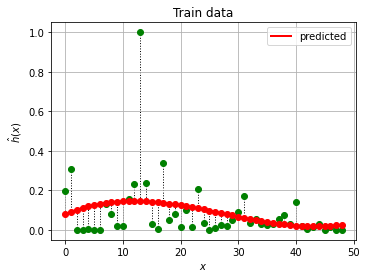

In [581]:
xxx = np.asarray(xx - black.formed.min())

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.vlines(X, ymin=y, ymax=f_pred(X), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X, y, color="green", zorder=2)
plt.plot(np.asarray(xxx), f_pred(xxx), "-", color="red", lw=2, label="predicted", zorder=2)
#plt.plot(xxx, yy/np.asarray(yy).max(), "o", color="SteelBlue", label="true function", zorder=1)
plt.plot(X, f_pred(X), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.show()

In [582]:
f_pred(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([[346.53314414]])

## 4) Progressive-metal

In [605]:
import random
datagraphs.shape

(4946, 11)

In [606]:
black = datagraphs.loc[datagraphs['main_style'] == 'Progressive']
black.shape

(244, 11)

In [607]:
black.loc[black['formed'] == 1985].head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
7,Dream Theater,2329,1985,USA,1985,Progressive,None,None,None,None,None
521,Shadow Gallery,149,1985,USA,1985,Progressive,None,None,None,None,None
926,Psychotic Waltz,68,1985,USA,-,Progressive,None,None,None,None,None


In [608]:
xx = np.arange(black.formed.min(), black.formed.max()+1)
# xx = shuffle(xx, random_state=0)
yy = []

for year in xx:
    black_y = black.loc[black['formed'] == year]
    black_fans = black_y.fans.sum()
    yy.append(black_fans)

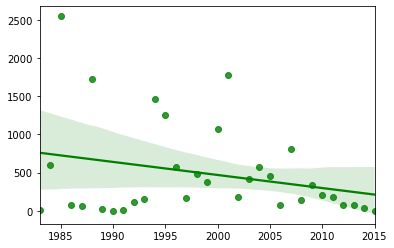

In [609]:
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
# np.random.seed(8)
# xx, yy = shuffle(xx, yy, random_state=0)
ax = sns.regplot(x=xx, y=yy, color="g")

In [610]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()

### Предсказание на 2020 год
Линейная регрессия

In [611]:
model1 = LinearRegression()
model1.fit(X, y)
model1.predict(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([125.53966132])

Полиномиальная регрессия

In [612]:
# Формирование последовательности действий
polynomial_transformation = PolynomialFeatures(degree=4)
model = LinearRegression(fit_intercept=False)

step__preprocessing = ("polynomial_transformation", polynomial_transformation)
step__prediction_model = ("linear_model", model)

pipeline = Pipeline([
    step__preprocessing, 
    step__prediction_model])

# Обучение
pipeline = pipeline.fit(X, y)

# Параметры обученной модели
print("Параметры модели:")
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx, coef))

# Функция предсказания
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

Параметры модели:
	w0 = 0.31568897663153533
	w1 = -0.0456070845701033
	w2 = 0.0059712507171486235
	w3 = -0.0002660672129865206
	w4 = 3.5619411393055684e-06


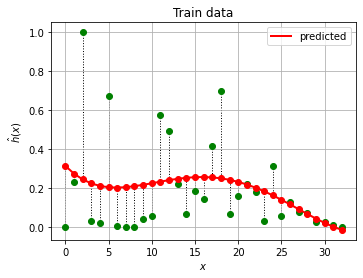

In [613]:
xxx = np.asarray(xx - black.formed.min())

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.vlines(X, ymin=y, ymax=f_pred(X), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X, y, color="green", zorder=2)
plt.plot(np.asarray(xxx), f_pred(xxx), "-", color="red", lw=2, label="predicted", zorder=2)
#plt.plot(xxx, yy/np.asarray(yy).max(), "o", color="SteelBlue", label="true function", zorder=1)
plt.plot(X, f_pred(X), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.show()

In [614]:
f_pred(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([[3.60948327]])

## 5) Doom-metal

In [642]:
import random
datagraphs.shape

(4946, 11)

In [643]:
black = datagraphs.loc[datagraphs['main_style'] == 'Doom']
black.shape

(227, 11)

In [644]:
black.loc[black['formed'] < 1985].head()

,band_name,fans,formed,origin,split,main_style,style_2,style_3,style_4,style_5,style_6
8,Black Sabbath,2307,1968,United Kingdom,-,Doom,Heavy,Hard rock,None,None,None
581,Saint Vitus,126,1979,USA,1979,Doom,None,None,None,None,None
590,Pentagram,124,1971,USA,-,Doom,None,None,None,None,None
911,Trouble,70,1979,USA,1979,Doom,Psychedelic doom,None,None,None,None
1139,Pagan Altar,50,1978,United Kingdom,1978,Doom,None,None,None,None,None


In [645]:
xx = np.arange(black.formed.min(), black.formed.max()+1)
# xx = shuffle(xx, random_state=0)
yy = []

for year in xx:
    black_y = black.loc[black['formed'] == year]
    black_fans = black_y.fans.sum()
    yy.append(black_fans)

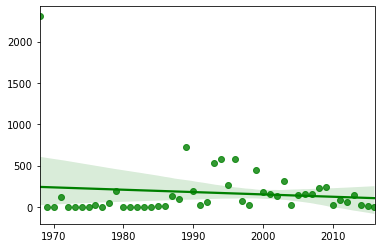

In [646]:
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
# np.random.seed(8)
# xx, yy = shuffle(xx, yy, random_state=0)
ax = sns.regplot(x=xx, y=yy, color="g")

In [647]:
X = np.asarray(xx - black.formed.min())
X = X.reshape(-1,1)
y = np.asarray(yy)/np.asarray(yy).max()

### Предсказание на 2020 год
Линейная регрессия

In [650]:
model1 = LinearRegression()
model1.fit(X, y)
model1.predict(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([94.53142857])

Полиномиальная регрессия

In [639]:
# Формирование последовательности действий
polynomial_transformation = PolynomialFeatures(degree=2)
model = LinearRegression(fit_intercept=False)

step__preprocessing = ("polynomial_transformation", polynomial_transformation)
step__prediction_model = ("linear_model", model)

pipeline = Pipeline([
    step__preprocessing, 
    step__prediction_model])

# Обучение
pipeline = pipeline.fit(X, y)

# Параметры обученной модели
print("Параметры модели:")
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx, coef))

# Функция предсказания
f_pred = lambda x : polyval(x, pipeline.named_steps["linear_model"].coef_)

Параметры модели:
	w0 = 0.12758224746335448
	w1 = -0.004132138758721278
	w2 = 6.050230179779122e-05


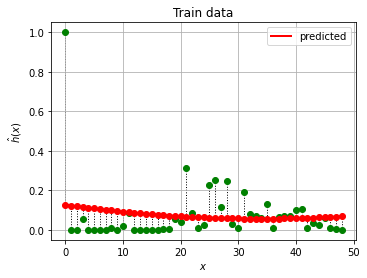

In [640]:
xxx = np.asarray(xx - black.formed.min())

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.vlines(X, ymin=y, ymax=f_pred(X), colors="black", linestyles="dotted", lw=1, zorder=1)
plt.scatter(X, y, color="green", zorder=2)
plt.plot(np.asarray(xxx), f_pred(xxx), "-", color="red", lw=2, label="predicted", zorder=2)
#plt.plot(xxx, yy/np.asarray(yy).max(), "o", color="SteelBlue", label="true function", zorder=1)
plt.plot(X, f_pred(X), "o", color="red", lw=2, zorder=3)
plt.xlabel("$x$")
plt.ylabel("$\hat{h}(x)$")
plt.legend()
plt.grid(True)

plt.show()

In [641]:
f_pred(np.asarray(2020 - black.formed.min()).reshape(-1,1))*np.asarray(yy).max()

array([[176.04545376]])

## Выводы по гипотезе "Перспективные жанры":
В результате проверки с помощью линейной регрессии самыми перспективными жанрами оказались Progressive-metal и Doom. Black-metal и Heavy-metal оказались самыми перспективными при расчёте с помощью полиномиальной регрессии. Death-metal показал одинаково плохой результат при расчёте с помощью двух моделей.  

